In [39]:
# Install required modules
!pip install jaqpot-python-sdk
!pip install jaqpot-api-client
!pip install python-dotenv
import pandas as pd

In [40]:
# Login to Jaqpot with API keys
from dotenv import load_dotenv
load_dotenv("keys.env") # Returns True if successful

True

In [41]:
# Initialize a JaqpotApiClient
from jaqpot_python_sdk.jaqpot_api_client import JaqpotApiClient
jaqpot_api_client = JaqpotApiClient()

In [42]:
input_data_dict = [{
    'dens_0': 1051, 'mw_0': 361.5, 'vpPa_0': 0, 'lkow_0': 6.8815, 'DermLKow': 6.8815, 'wsol_0': 0.003808, 'Resorpt_0': -100, 'FracHpRt_0': 0, 'dens_1': 0, 'mw_1': 0, 'vpPa_1': 0, 'lkow_1': 0, 'wsol_1': 0, 'Resorpt_1': 0, 'FracHpRt_1': 0, 'scenario': 1, 'body_weight': 70, 'Temp': 25, 'SkinArea': 20000, 'RespProt': 1, 'DermProt': 1, 'DecrBolusRt': 0, 'N_subs': 1, 'Cexp': 0, 'Cexp_times': 0, 'DeposRate': [0.2, 0], 'DeposRate_times': [0, 3], 'OralDose': 0, 'OralDose_times': 0, 'Vmax_Liver_0': 0, 'Vmax_p_Liver_0': 0, 'Km_Liver_0': 1, 'sim.start': 0, 'sim.end': 24, 'sim.step': 1
    }]


In [43]:
# Make predictions using IndusChemFate Lite on Jaqpot
prediction = jaqpot_api_client.predict_sync(model_id=2115, dataset=input_data_dict)
print(prediction)

[{'M_Adip_0': '0.000e+00', 'M_Adip_1': '0.000e+00', 'M_Bone_0': '0.000e+00', 'M_Bone_1': '0.000e+00', 'M_Brain_0': '0.000e+00', 'M_Brain_1': '0.000e+00', 'M_Heart_0': '0.000e+00', 'M_Heart_1': '0.000e+00', 'M_Kidney_0': '0.000e+00', 'M_Kidney_1': '0.000e+00', 'M_Intestine_0': '0.000e+00', 'M_Intestine_1': '0.000e+00', 'M_Liver_0': '0.000e+00', 'M_Liver_1': '0.000e+00', 'Cinh_0': '0.000e+00', 'M_Lung_0': '0.000e+00', 'M_Lung_1': '0.000e+00', 'M_Muscle_0': '0.000e+00', 'M_Muscle_1': '0.000e+00', 'M_Skin_0': '0.000e+00', 'M_Skin_1': '0.000e+00', 'DeposRate': '0.000e+00', 'StratCornAdd': '0.000e+00', 'StratCornDecr': '0.000e+00', 'EvapReal': '0.000e+00', 'EvapSC': '0.000e+00', 'Sum_Skin_Air': '0.000e+00', 'Sum_Skin_Liq': '0.000e+00', 'M_Marrow_0': '0.000e+00', 'M_Marrow_1': '0.000e+00', 'M_LungArt_0': '0.000e+00', 'M_LungArt_1': '0.000e+00', 'M_LungVen_0': '0.000e+00', 'M_LungVen_1': '0.000e+00', 'UrinExcr_0': '0.000e+00', 'UrinExcr_1': '0.000e+00', 'M_inhaled_0': '0.000e+00', 'Μ_Exh_0': '

In [44]:
prediction_df = pd.DataFrame(prediction)
prediction_df.to_csv('prediction_df.csv', index=False)

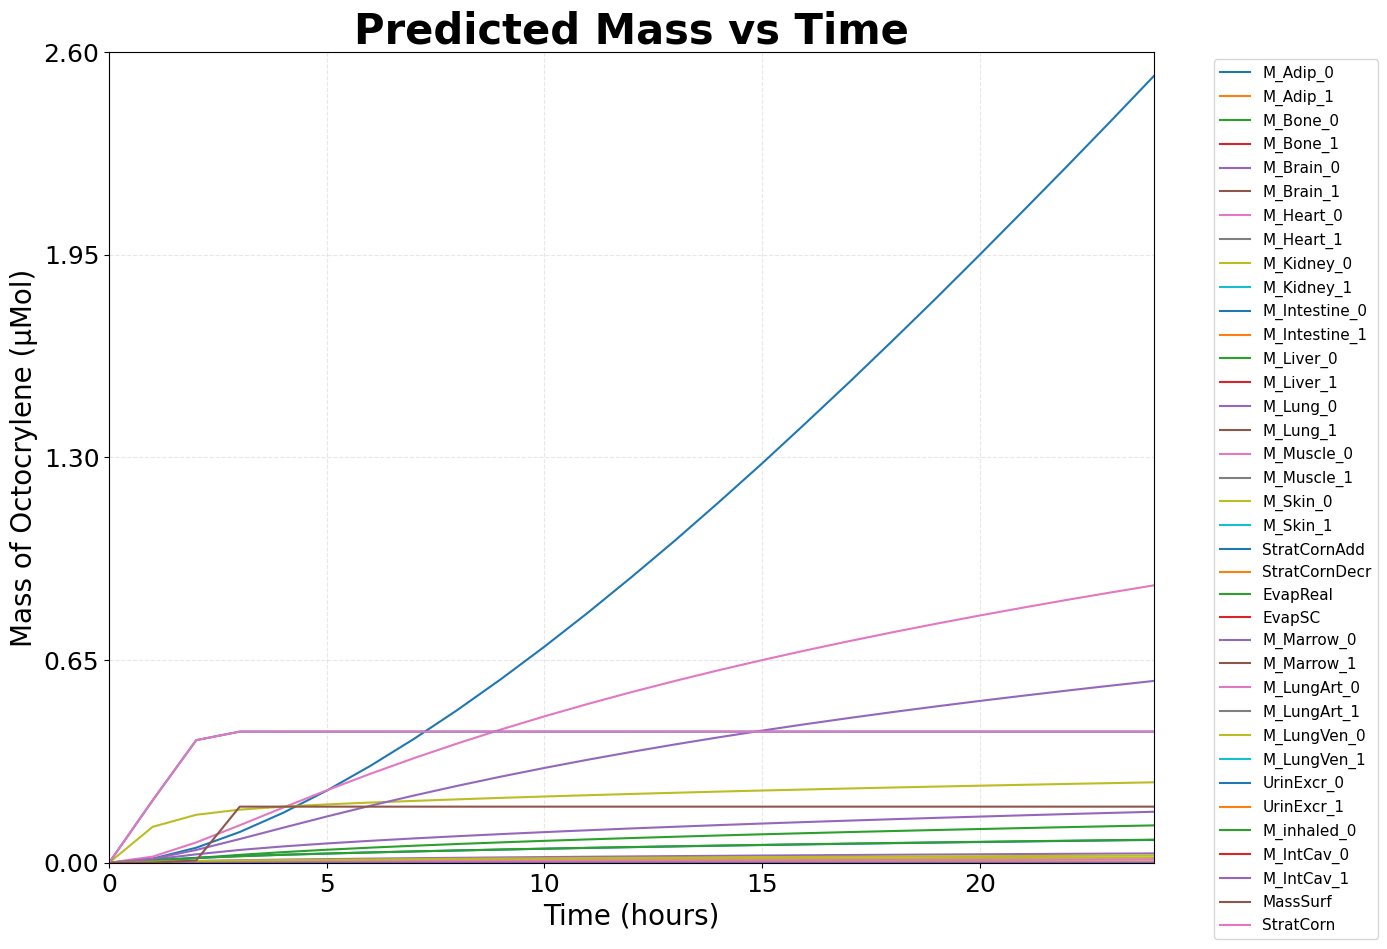

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('prediction_df.csv')

# List of parameters to plot
parameters = [
    "M_Adip_0", "M_Adip_1",
    "M_Bone_0", "M_Bone_1",
    "M_Brain_0", "M_Brain_1", "M_Heart_0", "M_Heart_1", "M_Kidney_0",
    "M_Kidney_1", "M_Intestine_0", "M_Intestine_1", "M_Liver_0",
    "M_Liver_1", "M_Lung_0", "M_Lung_1", "M_Muscle_0",
    "M_Muscle_1", "M_Skin_0", "M_Skin_1", "StratCornAdd",
    "StratCornDecr", "EvapReal", "EvapSC", "M_Marrow_0",
    "M_Marrow_1", "M_LungArt_0", "M_LungArt_1", "M_LungVen_0",
    "M_LungVen_1", "UrinExcr_0", "UrinExcr_1", "M_inhaled_0",
    "M_Exh_0", "M_Exh_1", "M_IntCav_0", "M_IntCav_1", "MassSurf",
    "StratCorn"
]

# Create a large figure for better visibility
plt.figure(figsize=(14, 10))

# Plot each parameter with a distinct line style and reasonable thickness
for i, param in enumerate(parameters):
    if param in df.columns:
        plt.plot(df['time'], df[param], label=param, linewidth=1.5)

# Set plot properties with improved formatting
plt.xlabel('Time (hours)', fontsize=20)
plt.ylabel('Mass of Octocrylene (μMol)', fontsize=20)
plt.title('Predicted Mass vs Time', fontsize=30, fontweight='bold')

# Improve x-axis ticks and grid
plt.xticks(fontsize=18)
plt.xlim(0, max(df['time']))  # Set proper x-axis limits
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Set the specific y-axis ticks you want
y_ticks = [0, 0.65, 1.3, 1.95, 2.6]
plt.yticks(y_ticks, fontsize=18)
plt.ylim(0, 2.6)  # Set y-axis limits to match your ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11, frameon=True)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('parameters_vs_time_mass.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

C_Urine_0    0
C_Urine_1    0
Name: 0, dtype: object


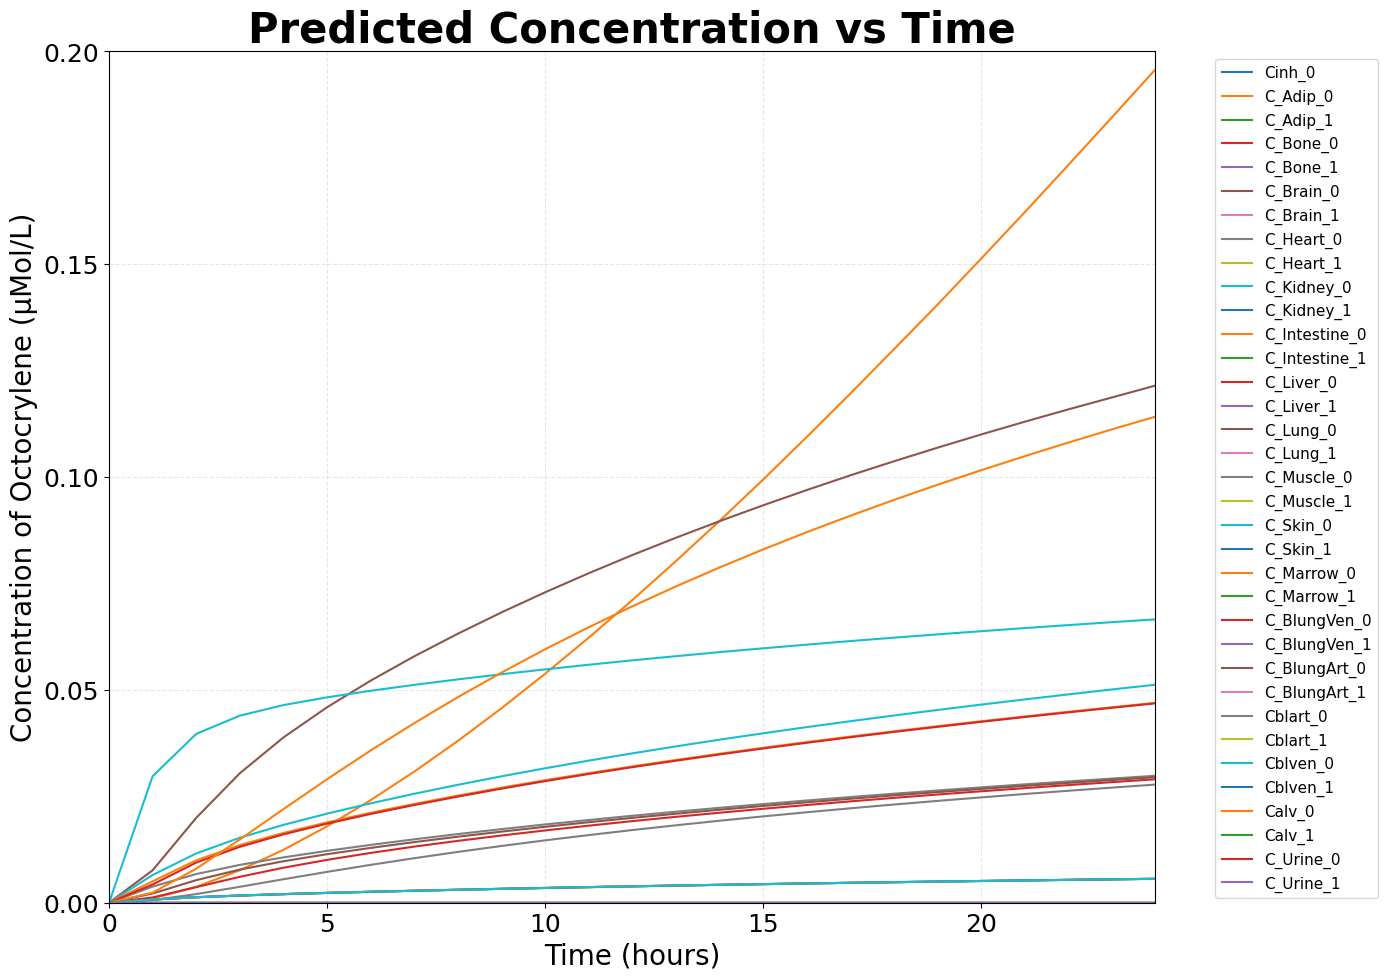

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('prediction_df.csv')
df.iloc[0, df.columns.get_indexer(["C_Urine_0", "C_Urine_1"])] = 0
print(df[["C_Urine_0", "C_Urine_1"]].iloc[0])

# List of parameters to plot
parameters = [
    "Cinh_0", "C_Adip_0", "C_Adip_1", "C_Bone_0", "C_Bone_1",
    "C_Brain_0", "C_Brain_1", "C_Heart_0", "C_Heart_1",
    "C_Kidney_0", "C_Kidney_1", "C_Intestine_0", "C_Intestine_1",
    "C_Liver_0", "C_Liver_1", "C_Lung_0", "C_Lung_1", "C_Muscle_0",
    "C_Muscle_1", "C_Skin_0", "C_Skin_1", "C_Marrow_0",
    "C_Marrow_1", "C_BlungVen_0", "C_BlungVen_1", "C_BlungArt_0",
    "C_BlungArt_1", "Cblart_0", "Cblart_1", "Cblven_0", "Cblven_1",
    "Calv_0", "Calv_1",
    "C_Urine_0",
    "C_Urine_1"
]

# Create a large figure for better visibility
plt.figure(figsize=(14, 10))

# Plot each parameter with a distinct line style and reasonable thickness
for i, param in enumerate(parameters):
    if param in df.columns:
        plt.plot(df['time'], df[param], label=param, linewidth=1.5)

# Set plot properties with improved formatting
plt.xlabel('Time (hours)', fontsize=20)
plt.ylabel('Concentration of Octocrylene (μMol/L)', fontsize=20)
plt.title('Predicted Concentration vs Time', fontsize=30, fontweight='bold')

# Improve x-axis ticks and grid
plt.xticks(fontsize=18)
plt.xlim(0, max(df['time']))  # Set proper x-axis limits
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Set the specific y-axis ticks you want
y_ticks = [0, 0.05, 0.1, 0.15, 0.2]
plt.yticks(y_ticks, fontsize=18)
plt.ylim(0, 0.2)  # Set y-axis limits to match your ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11, frameon=True)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('parameters_vs_time_concentration.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()